### 20181013 flow data

In [3]:
import fcsparser

import pandas as pd
import math
import os
#import all data, and merge into a single datatframe, with sample names in extra columns


def log_trans(x):
    try:
        return math.log(x, 10)
    except:
        return float('NaN')
    
cell_lines = ['54_UGAC-blast_x',
'55_UGAC-blast_x',
'56_UGAC_x',
'57_UGAC_a',
'58_AQP4_x',
'59_AQP4_a',
'60_OPRL1_x',
'61_OPRL1_a']
treatments = ['none', '100nM SMG1i', '500ug/ml G418']
data_folder = '20181013_G418_smg1i'

#will only look at data gated on good scatter

dfs = []
index = 0
for treatment in treatments:
    for cell_line in cell_lines:
        index += 1
        data_file_name = 'Specimen_001_BFP_GFP_tdtomato_%03d_%03d.fcs' % (index, index)
        data_file_path = os.path.join(data_folder, data_file_name)
        meta, data = fcsparser.parse(data_file_path, meta_data_only=False, reformat_meta=True)
        data['cell line'] = cell_line
        data['treatment'] = treatment
        data['sample'] = '%s %s' % (cell_line, treatment)
        #print '%s %s' % (cell_line, treatment)
        #print meta['_channels_']
        #meta_dfs.append(meta)
        #dfs.append(data.sample(n=1000)) 
        dfs.append(data[:5000]) #to subsample and speed up plotting, use the above line instead of this one
all_data = pd.concat(dfs)


In [ ]:
#first just look at the forward and side scatter
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde
import numpy as np
sns.set(style="white", color_codes=True)
def density_colored_scatter(x, y, color, **kwargs):
    # Calculate the point density
    xy = np.vstack([x,y])
    z = gaussian_kde(xy)(xy)
    plt.scatter(x, y, c=z, **kwargs)
    #plt.yscale('log')
    #plt.xscale('log')
    cutoff = 80000
    pos = [yval for yval in y if yval>=cutoff]
    percent_pos = 100.*len(pos)/len(y)
    plt.hlines(cutoff,0,40000, linestyle='dashed')
    plt.annotate("%.3f" % percent_pos, xy=(30000, cutoff+1))


g = sns.FacetGrid(all_data, col="sample", col_wrap=4)

cmap = 'viridis'
g= g.map(density_colored_scatter, "FSC-H", "FSC-W", cmap=cmap, s=1, linewidth=0)
plt.savefig('20181013_FSC_WH.pdf', transparent=True)
plt.savefig('20181013_FSC_WH.png', transparent=True)


In [4]:
fsc_filter = all_data[all_data['FSC-W']<80000]

In [ ]:
#first just look at the forward and side scatter
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde
import numpy as np
sns.set(style="white", color_codes=True)
def density_colored_scatter(x, y, color, **kwargs):
    # Calculate the point density
    xy = np.vstack([x,y])
    z = gaussian_kde(xy)(xy)
    plt.scatter(x, y, c=z, **kwargs)
    #plt.yscale('log')
    #plt.xscale('log')
    cutoff = 100000
    pos = [yval for yval in y if yval>=cutoff]
    percent_pos = 100.*len(pos)/len(y)
    plt.hlines(cutoff,0,20000, linestyle='dashed')
    plt.annotate("%.3f" % percent_pos, xy=(2000, cutoff+1))

#,ylim=(1,1000000)
g = sns.FacetGrid(all_data, col="sample", col_wrap=4, xlim=(0,20000), ylim=(0,200000))

cmap = 'viridis'
g= g.map(density_colored_scatter, "SSC-H", "SSC-W", cmap=cmap, s=1, linewidth=0)
plt.savefig('20181013_SSC_WH.pdf', transparent=True)
plt.savefig('20181013_SSC_WH.png', transparent=True)


In [5]:
fsc_ssc_filter = fsc_filter[fsc_filter['SSC-W']<100000]

In [ ]:
#first just look at the forward and side scatter
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde
import numpy as np
sns.set(style="white", color_codes=True)
def density_colored_scatter(x, y, color, **kwargs):
    # Calculate the point density
    xy = np.vstack([x,y])
    z = gaussian_kde(xy)(xy)
    plt.scatter(x, y, c=z, **kwargs)
    plt.yscale('log')
    plt.xscale('log')
    #cutoff = 400
    #pos = [xval for xval in x if xval>=cutoff]
    #percent_pos = 100.*len(pos)/len(x)
    #plt.vlines(cutoff,1,1000000, linestyle='dashed')
    #plt.annotate("%.1f" % percent_pos, xy=(cutoff+1, 500000))
    
#xlim=(1,1000000),ylim=(1,1000000)
g = sns.FacetGrid(fsc_ssc_filter, col="sample", col_wrap=4)

cmap = 'viridis'
g= g.map(density_colored_scatter, "FSC-A", "SSC-A", cmap=cmap, s=1, linewidth=0)
plt.savefig('20181013_fsc_ssc_filtered_FSC_SSC_A.pdf', transparent=True)
plt.savefig('20181013_fsc_ssc_filtered_FSC_SSC_A.png', transparent=True)


In [6]:
good_scatter = fsc_ssc_filter.rename(index=str, columns={'PE-A':'tdTomato-A', 'Pacific Blue-A':'tagBFP-A'})
good_scatter['tdTomato/tagBFP'] = good_scatter['tdTomato-A']/good_scatter['tagBFP-A']
good_scatter['log tdTomato'] = good_scatter['tdTomato-A'].apply(log_trans)
good_scatter['log tagBFP'] = good_scatter['tagBFP-A'].apply(log_trans)
good_scatter['log GFP'] = good_scatter['GFP-A'].apply(log_trans)
good_scatter['log tdTomato/tagBFP'] = good_scatter['tdTomato/tagBFP'].apply(log_trans)

In [ ]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white", color_codes=True)

fluor_reporters = ['56_UGAC_x',
'57_UGAC_a',
'58_AQP4_x',
'59_AQP4_a',
'60_OPRL1_x',
'61_OPRL1_a']

blast_reporters = ['54_UGAC-blast_x',
'55_UGAC-blast_x']

fig, ax = plt.subplots(1,3, figsize=(16, 8), sharey=False)
sns.boxplot(x="cell line", y="log tagBFP", hue='treatment', data=good_scatter[good_scatter['cell line'].isin(fluor_reporters)], ax=ax[0], notch=True, linewidth=1)
sns.boxplot(x="cell line", y="log tdTomato", hue='treatment', data=good_scatter[good_scatter['cell line'].isin(fluor_reporters)], ax=ax[1], notch=True, linewidth=1)
sns.boxplot(x="cell line", y="log tdTomato/tagBFP", hue='treatment', data=good_scatter[good_scatter['cell line'].isin(fluor_reporters)], ax=ax[2], notch=True, linewidth=1)

for ind_axis in ax:
    for label in ind_axis.get_xticklabels():
        label.set_rotation(90)
plt.savefig('20181013_log_tagBFP_tdTomato.pdf', transparent=True)

In [ ]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white", color_codes=True)

fluor_reporters = ['56_UGAC_x',
'57_UGAC_a',
'58_AQP4_x',
'59_AQP4_a',
'60_OPRL1_x',
'61_OPRL1_a']

blast_reporters = ['56_UGAC_x', '54_UGAC-blast_x',
'55_UGAC-blast_x']

fig, ax = plt.subplots(1,2, figsize=(16, 8), sharey=False)
sns.boxplot(x="cell line", y="log tagBFP", hue='treatment', data=good_scatter[good_scatter['cell line'].isin(blast_reporters)], ax=ax[0], notch=True, linewidth=1)
sns.boxplot(x="cell line", y="log GFP", hue='treatment', data=good_scatter[good_scatter['cell line'].isin(blast_reporters)], ax=ax[1], notch=True, linewidth=1)

for ind_axis in ax:
    for label in ind_axis.get_xticklabels():
        label.set_rotation(90)
plt.savefig('20181013_log_tagBFP_eGFP.pdf', transparent=True)

In [ ]:
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde
import numpy as np
sns.set(style="white", color_codes=True)
colors = ["greyish", "windows blue", "amber", "faded green", "dusty purple"]
sns.set_palette(sns.xkcd_palette(colors))
g = sns.FacetGrid(good_scatter, col="cell line", hue="treatment", col_wrap=4,
                  legend_out=True)
#xlim=(0,5000),ylim=(0,1000)
g= g.map(plt.scatter, "log tagBFP", "log tdTomato", cmap=cmap, s=5, linewidth=0, alpha=0.5)
g = g.add_legend()

#for i, ax in enumerate(g.axes.flat):
#    ax.set_yscale('log')
#    ax.set_xscale('log')
plt.savefig('201801013_tagBFP_tdTomato_log_scatter_hue.pdf', transparent=True)
plt.savefig('201801013_tagBFP_tdTomato_log_scatter_hue.png', transparent=True)
#plt.legend()


In [ ]:
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde
import numpy as np
sns.set(style="white", color_codes=True)
colors = ["greyish", "windows blue", "amber", "faded green", "dusty purple"]
sns.set_palette(sns.xkcd_palette(colors))
g = sns.FacetGrid(good_scatter, col="cell line", hue="treatment", col_wrap=4,
                  legend_out=True)
#xlim=(0,5000),ylim=(0,1000)
g= g.map(plt.scatter, "log tagBFP", "log GFP", cmap=cmap, s=5, linewidth=0, alpha=0.5)
g = g.add_legend()

#for i, ax in enumerate(g.axes.flat):
#    ax.set_yscale('log')
#    ax.set_xscale('log')
plt.savefig('201801013_tagBFP_GFP_log_scatter_hue.pdf', transparent=True)
plt.savefig('201801013_tagBFP_GFP_log_scatter_hue.png', transparent=True)
#plt.legend()


### 20181104 for lab meeting
Make KDE histograms of data and theoretical 5% gating estimates for ratios

In [ ]:
subset_samples = ['54_UGAC-blast_x', '56_UGAC_x','58_AQP4_x','60_OPRL1_x']
subset_data = good_scatter[good_scatter['cell line'].isin(subset_samples)]
from scipy.stats import gaussian_kde
import numpy as np
sns.set(style="white", color_codes=True, font_scale=3)
g = sns.FacetGrid(subset_data, hue='treatment', col='cell line', col_wrap=4, height=8)
g.map(sns.kdeplot, 'log tagBFP', linewidth = 5)
#g.fig.suptitle("filtered for td", size=16)
g.add_legend();
plt.savefig('20181104_log_tagBFP_kde.pdf', transparent=True)


In [ ]:
from scipy.stats import gaussian_kde
import numpy as np
sns.set(style="white", color_codes=True, font_scale=3)
g = sns.FacetGrid(subset_data, hue='treatment', col='cell line', col_wrap=4, height=8)
g.map(sns.kdeplot, 'log tdTomato', linewidth = 5)
#g.fig.suptitle("filtered for td", size=16)
g.add_legend();
plt.savefig('20181104_log_tdTomato_kde.pdf', transparent=True)


In [ ]:
from scipy.stats import gaussian_kde
import numpy as np
sns.set(style="white", color_codes=True, font_scale=3)
g = sns.FacetGrid(subset_data, hue='treatment', col='cell line', col_wrap=4, height=8)
g.map(sns.kdeplot, "log tdTomato/tagBFP", linewidth = 5)
#g.fig.suptitle("filtered for td", size=16)
g.add_legend();
plt.savefig('20181104_log_tdTomato_tagBFP_ratio_kde.pdf', transparent=True)


In [ ]:
#Figure out top and bottom 5% cutoff for controls, then compute gate %

from scipy.stats import gaussian_kde
import numpy as np
sns.set(style="white", color_codes=True, font_scale=3)
g = sns.FacetGrid(subset_data, col_order=subset_samples, hue='treatment', col='cell line', col_wrap=4, height=8)
g.map(sns.kdeplot, "log tdTomato/tagBFP", linewidth = 5)
#g.fig.suptitle("filtered for td", size=16)
g.add_legend();
axes = g.axes
#axes[0].vlines((bottom5_56, top5_56),0,3, linestyle='dashed', lw=3)
#axes[1].vlines((bottom5_58, top5_58),0,3, linestyle='dashed', lw=3)


ax_index = 0
treatments = ['none', '100nM SMG1i', '500ug/ml G418']
for cell_line in subset_samples:
    untreated_distribution = good_scatter[good_scatter['sample'] == '%s none' % (cell_line)].sort_values(by='log tdTomato/tagBFP')
    bottom5  = untreated_distribution.iloc[int(.05*len(untreated_distribution))]['log tdTomato/tagBFP']
    top5  = untreated_distribution.iloc[int(.95*len(untreated_distribution))]['log tdTomato/tagBFP']
    axes[ax_index].vlines((bottom5, top5),0,5, linestyle='dashed', lw=3)
    axes[ax_index].set_ylim(0,5.5)
    for treatment in treatments:
        sample = '%s %s' % (cell_line, treatment)
        sample_data = good_scatter[good_scatter['sample']==sample]
        print '%s bottom 5 gate: %.2f' % (sample, 100.*len(sample_data[sample_data['log tdTomato/tagBFP']<bottom5])/float(len(sample_data)))
        print '%s top 5 gate: %.2f' % (sample, 100.*len(sample_data[sample_data['log tdTomato/tagBFP']>top5])/float(len(sample_data)))
    ax_index+=1
    
plt.savefig('20181104_log_tdTomato_tagBFP_ratio_kde_gating.pdf', transparent=True)


## 20190624 - Figures for RNA club talk

In [7]:
grouped_data = good_scatter.groupby(['cell line', 'treatment'])

In [8]:
#colors - colorblind safe
black = (0,0,0)
gray = (0.6,0.6,0.6)
orange = (230/255.0,159/255.0,0)
skyBlue = (86/255.0,180/255.0,233/255.0)
bluishGreen = (0,158/255.0,115/255.0)
yellow = (240/255.0,228/255.0,66/255.0)
blue = (0,114/255.0,178/255.0)
vermillion = (213/255.0,94/255.0,0)
reddishPurple = (204/255.0,121/255.0,167/255.0)
colors = [black, vermillion, orange, skyBlue, bluishGreen, blue, reddishPurple, yellow, gray]

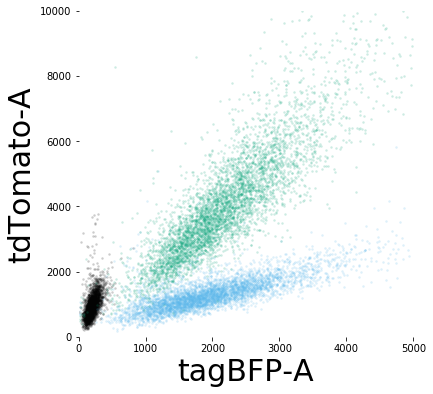

In [10]:
%matplotlib inline
import warnings
import matplotlib as mpl

warnings.filterwarnings("ignore")
mpl.rcParams['pdf.fonttype'] = 42

import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

#xmin=0
#xmax=100
#ymin=-0.1
#ymax=4
plots=[]
num_plots_wide = 1
num_plots_high = 1
plotting_cell_lines = ['56_UGAC_x','58_AQP4_x','60_OPRL1_x']
plotting_treatments = ['none']


x_var='tagBFP-A'
y_var='tdTomato-A'
plot_index =1
fig = plt.figure(figsize=(6*num_plots_wide, 6*num_plots_high))

colors=[black, skyBlue, bluishGreen]
for treatment in plotting_treatments:
    color_index=0
    plot = fig.add_subplot(num_plots_high, num_plots_wide, plot_index)
    for cell_line in plotting_cell_lines:
        plots.append(plot)
        data = grouped_data.get_group((cell_line, treatment))
        data.plot.scatter(x=x_var,y=y_var, color=colors[color_index], alpha=0.2, ax=plot, lw=0, s=6)
        #DMSO_data.plot.scatter(x=x_var, y=y_var, color=black, alpha=0.2, ax=plot, lw=0, s=6)

        #plot.set_title('%s %s'% (stop_codon, gene), fontsize=24)
        plot.set_xlabel(x_var, fontsize=30)
        plot.set_ylabel(y_var, fontsize=30)
        plot.set_xlim(0, 5000)
        plot.set_ylim(0, 10000)
        color_index+=1
    plot_index += 1
plt.box(False)
#plt.savefig('20190611_scatter_smg1i_vs_dmso.pdf', transparent=True)
#plt.savefig('20190611_scatter_smg1i_vs_dmso.png', transparent=True)

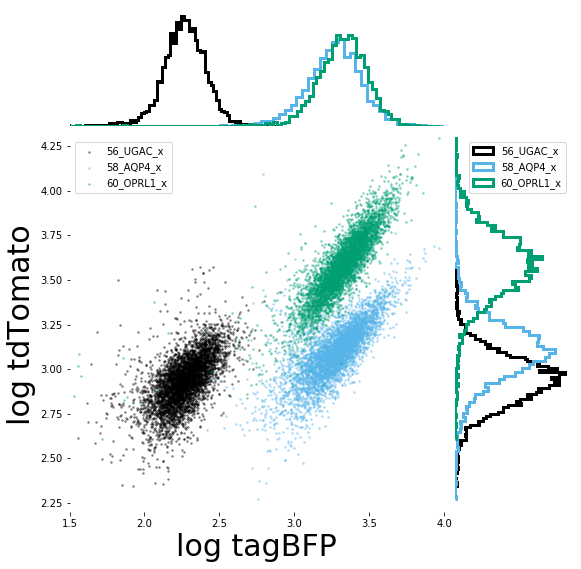

In [55]:
%matplotlib inline
import warnings
import matplotlib as mpl

warnings.filterwarnings("ignore")
mpl.rcParams['pdf.fonttype'] = 42

import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
from matplotlib.ticker import NullFormatter

plotting_cell_lines = ['56_UGAC_x','58_AQP4_x','60_OPRL1_x']
plotting_treatments = ['none']


nullfmt = NullFormatter()         # no labels

# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left + width + 0.02

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom_h, width, 0.2]
rect_histy = [left_h, bottom, 0.2, height]

# start with a rectangular Figure
plt.figure(1, figsize=(8, 8))

axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)

# no labels
axHistx.xaxis.set_major_formatter(nullfmt)
axHisty.yaxis.set_major_formatter(nullfmt)

axes = [axScatter, axHistx, axHisty]
hist_axes = [axHistx, axHisty]

x_var='log tagBFP'
y_var='log tdTomato'

colors=[black, skyBlue, bluishGreen]
for treatment in plotting_treatments:
    color_index=0
    for cell_line in plotting_cell_lines:
        data = grouped_data.get_group((cell_line, treatment))
        
        data.plot.scatter(x=x_var,y=y_var, color=colors[color_index], alpha=0.5, ax=axScatter, lw=0, s=6, label = cell_line)
        data[x_var].plot.hist(histtype='step', bins=100, normed=True, color=colors[color_index], alpha=1, ax=axHistx, lw=3, label = cell_line)
        data[y_var].plot.hist(histtype='step', bins=100, normed=True, color=colors[color_index], alpha=1, ax=axHisty, lw=3, orientation='horizontal', label = cell_line)
        
        color_index+=1
        
for axis in axes:
    for dir in axis.spines:
        axis.spines[dir].set_visible(False)
for axis in hist_axes:
    axis.get_xaxis().set_ticks([])
    axis.get_yaxis().set_ticks([])
    axis.set_ylabel('')
    axis.set_xlabel('')

axScatter.set_xlabel(x_var, fontsize=30)
axScatter.set_ylabel(y_var, fontsize=30)
axScatter.set_xlim(1.5, 4)
axScatter.set_ylim(2.2, 4.3)
axHistx.set_xlim(axScatter.get_xlim())
axHisty.set_ylim(axScatter.get_ylim())

plt.legend()
plt.savefig('E4.036_20190624_compare_contexts_log.pdf', transparent=True)
#plt.savefig('E4.036_20190624_compare_contexts_log.pdf', transparent=True)

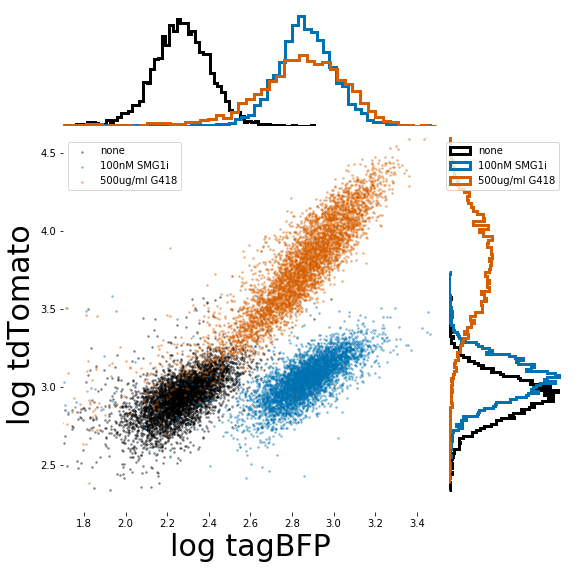

In [56]:
%matplotlib inline
import warnings
import matplotlib as mpl

warnings.filterwarnings("ignore")
mpl.rcParams['pdf.fonttype'] = 42

import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
from matplotlib.ticker import NullFormatter

plotting_cell_lines = ['56_UGAC_x']
plotting_treatments = ['none', '100nM SMG1i', '500ug/ml G418']


nullfmt = NullFormatter()         # no labels

# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left + width + 0.02

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom_h, width, 0.2]
rect_histy = [left_h, bottom, 0.2, height]

# start with a rectangular Figure
plt.figure(1, figsize=(8, 8))

axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)

# no labels
axHistx.xaxis.set_major_formatter(nullfmt)
axHisty.yaxis.set_major_formatter(nullfmt)

axes = [axScatter, axHistx, axHisty]
hist_axes = [axHistx, axHisty]

x_var='log tagBFP'
y_var='log tdTomato'

colors=[black, blue, vermillion]
color_index=0
for treatment in plotting_treatments:
    for cell_line in plotting_cell_lines:
        data = grouped_data.get_group((cell_line, treatment))
        
        data.plot.scatter(x=x_var,y=y_var, color=colors[color_index], alpha=0.5, ax=axScatter, lw=0, s=6, label = treatment)
        data[x_var].plot.hist(histtype='step', bins=100, normed=True, color=colors[color_index], alpha=1, ax=axHistx, lw=3, label = treatment)
        data[y_var].plot.hist(histtype='step', bins=100, normed=True, color=colors[color_index], alpha=1, ax=axHisty, lw=3, orientation='horizontal', label = treatment)
        
        color_index+=1
        
for axis in axes:
    for dir in axis.spines:
        axis.spines[dir].set_visible(False)
for axis in hist_axes:
    axis.get_xaxis().set_ticks([])
    axis.get_yaxis().set_ticks([])
    axis.set_ylabel('')
    axis.set_xlabel('')

axScatter.set_xlabel(x_var, fontsize=30)
axScatter.set_ylabel(y_var, fontsize=30)
axScatter.set_xlim(1.7, 3.5)
axScatter.set_ylim(2.2, 4.6)
axHistx.set_xlim(axScatter.get_xlim())
axHisty.set_ylim(axScatter.get_ylim())

plt.legend()
plt.savefig('E4.036_20190624_UGAC_compare_treatments_log.pdf', transparent=True)
#plt.savefig('E4.036_20190624_compare_contexts_log.pdf', transparent=True)

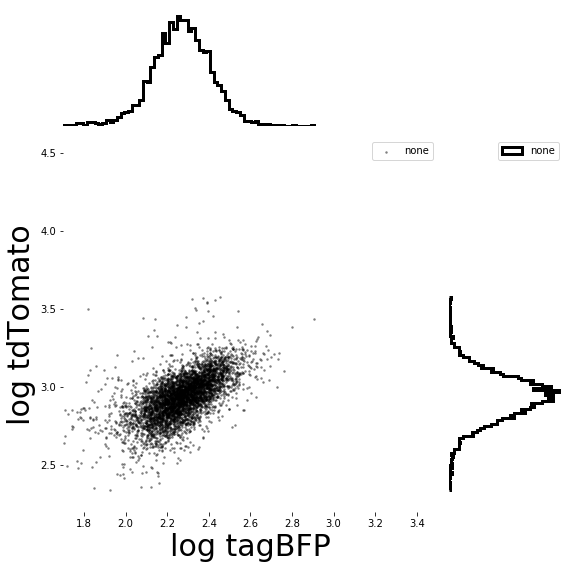

In [59]:
%matplotlib inline
import warnings
import matplotlib as mpl

warnings.filterwarnings("ignore")
mpl.rcParams['pdf.fonttype'] = 42

import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
from matplotlib.ticker import NullFormatter

plotting_cell_lines = ['56_UGAC_x']
plotting_treatments = ['none']


nullfmt = NullFormatter()         # no labels

# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left + width + 0.02

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom_h, width, 0.2]
rect_histy = [left_h, bottom, 0.2, height]

# start with a rectangular Figure
plt.figure(1, figsize=(8, 8))

axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)

# no labels
axHistx.xaxis.set_major_formatter(nullfmt)
axHisty.yaxis.set_major_formatter(nullfmt)

axes = [axScatter, axHistx, axHisty]
hist_axes = [axHistx, axHisty]

x_var='log tagBFP'
y_var='log tdTomato'

colors=[black, blue, vermillion]
color_index=0
for treatment in plotting_treatments:
    for cell_line in plotting_cell_lines:
        data = grouped_data.get_group((cell_line, treatment))
        
        data.plot.scatter(x=x_var,y=y_var, color=colors[color_index], alpha=0.5, ax=axScatter, lw=0, s=6, label = treatment)
        data[x_var].plot.hist(histtype='step', bins=100, normed=True, color=colors[color_index], alpha=1, ax=axHistx, lw=3, label = treatment)
        data[y_var].plot.hist(histtype='step', bins=100, normed=True, color=colors[color_index], alpha=1, ax=axHisty, lw=3, orientation='horizontal', label = treatment)
        
        color_index+=1
        
for axis in axes:
    for dir in axis.spines:
        axis.spines[dir].set_visible(False)
for axis in hist_axes:
    axis.get_xaxis().set_ticks([])
    axis.get_yaxis().set_ticks([])
    axis.set_ylabel('')
    axis.set_xlabel('')

axScatter.set_xlabel(x_var, fontsize=30)
axScatter.set_ylabel(y_var, fontsize=30)
axScatter.set_xlim(1.7, 3.5)
axScatter.set_ylim(2.2, 4.6)
axHistx.set_xlim(axScatter.get_xlim())
axHisty.set_ylim(axScatter.get_ylim())

plt.legend()
plt.savefig('E4.036_20190624_UGAC_compare_treatments_none_log.pdf', transparent=True)
#plt.savefig('E4.036_20190624_compare_contexts_log.pdf', transparent=True)

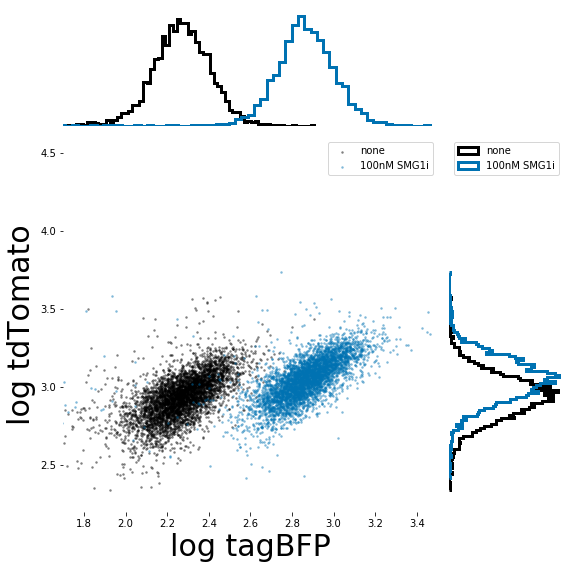

In [62]:
%matplotlib inline
import warnings
import matplotlib as mpl

warnings.filterwarnings("ignore")
mpl.rcParams['pdf.fonttype'] = 42

import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
from matplotlib.ticker import NullFormatter

plotting_cell_lines = ['56_UGAC_x']
plotting_treatments = ['none', '100nM SMG1i']


nullfmt = NullFormatter()         # no labels

# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left + width + 0.02

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom_h, width, 0.2]
rect_histy = [left_h, bottom, 0.2, height]

# start with a rectangular Figure
plt.figure(1, figsize=(8, 8))

axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)

# no labels
axHistx.xaxis.set_major_formatter(nullfmt)
axHisty.yaxis.set_major_formatter(nullfmt)

axes = [axScatter, axHistx, axHisty]
hist_axes = [axHistx, axHisty]

x_var='log tagBFP'
y_var='log tdTomato'

colors=[black, blue, vermillion]
color_index=0
for treatment in plotting_treatments:
    for cell_line in plotting_cell_lines:
        data = grouped_data.get_group((cell_line, treatment))
        
        data.plot.scatter(x=x_var,y=y_var, color=colors[color_index], alpha=0.5, ax=axScatter, lw=0, s=6, label = treatment)
        data[x_var].plot.hist(histtype='step', bins=100, normed=True, color=colors[color_index], alpha=1, ax=axHistx, lw=3, label = treatment)
        data[y_var].plot.hist(histtype='step', bins=100, normed=True, color=colors[color_index], alpha=1, ax=axHisty, lw=3, orientation='horizontal', label = treatment)
        
        color_index+=1
        
for axis in axes:
    for dir in axis.spines:
        axis.spines[dir].set_visible(False)
for axis in hist_axes:
    axis.get_xaxis().set_ticks([])
    axis.get_yaxis().set_ticks([])
    axis.set_ylabel('')
    axis.set_xlabel('')

axScatter.set_xlabel(x_var, fontsize=30)
axScatter.set_ylabel(y_var, fontsize=30)
axScatter.set_xlim(1.7, 3.5)
axScatter.set_ylim(2.2, 4.6)
axHistx.set_xlim(axScatter.get_xlim())
axHisty.set_ylim(axScatter.get_ylim())

plt.legend()
plt.savefig('E4.036_20190624_UGAC_compare_treatments_none_smg1i_log.pdf', transparent=True)
#plt.savefig('E4.036_20190624_compare_contexts_log.pdf', transparent=True)

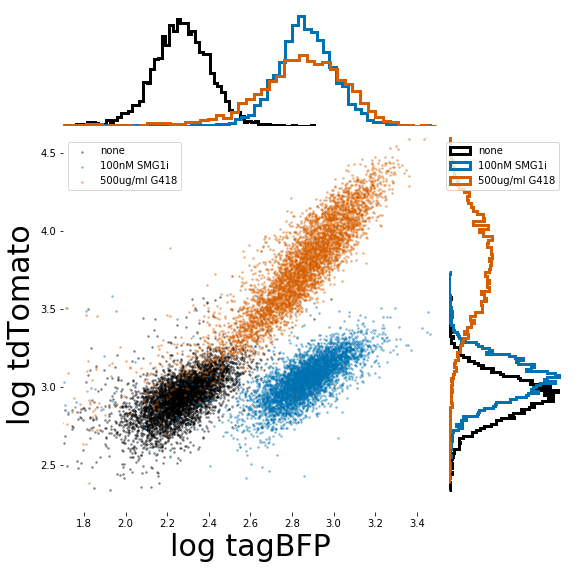

In [61]:
%matplotlib inline
import warnings
import matplotlib as mpl

warnings.filterwarnings("ignore")
mpl.rcParams['pdf.fonttype'] = 42

import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
from matplotlib.ticker import NullFormatter

plotting_cell_lines = ['56_UGAC_x']
plotting_treatments = ['none', '100nM SMG1i', '500ug/ml G418']


nullfmt = NullFormatter()         # no labels

# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left + width + 0.02

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom_h, width, 0.2]
rect_histy = [left_h, bottom, 0.2, height]

# start with a rectangular Figure
plt.figure(1, figsize=(8, 8))

axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)

# no labels
axHistx.xaxis.set_major_formatter(nullfmt)
axHisty.yaxis.set_major_formatter(nullfmt)

axes = [axScatter, axHistx, axHisty]
hist_axes = [axHistx, axHisty]

x_var='log tagBFP'
y_var='log tdTomato'

colors=[black, blue, vermillion]
color_index=0
for treatment in plotting_treatments:
    for cell_line in plotting_cell_lines:
        data = grouped_data.get_group((cell_line, treatment))
        
        data.plot.scatter(x=x_var,y=y_var, color=colors[color_index], alpha=0.5, ax=axScatter, lw=0, s=6, label = treatment)
        data[x_var].plot.hist(histtype='step', bins=100, normed=True, color=colors[color_index], alpha=1, ax=axHistx, lw=3, label = treatment)
        data[y_var].plot.hist(histtype='step', bins=100, normed=True, color=colors[color_index], alpha=1, ax=axHisty, lw=3, orientation='horizontal', label = treatment)
        
        color_index+=1
        
for axis in axes:
    for dir in axis.spines:
        axis.spines[dir].set_visible(False)
for axis in hist_axes:
    axis.get_xaxis().set_ticks([])
    axis.get_yaxis().set_ticks([])
    axis.set_ylabel('')
    axis.set_xlabel('')

axScatter.set_xlabel(x_var, fontsize=30)
axScatter.set_ylabel(y_var, fontsize=30)
axScatter.set_xlim(1.7, 3.5)
axScatter.set_ylim(2.2, 4.6)
axHistx.set_xlim(axScatter.get_xlim())
axHisty.set_ylim(axScatter.get_ylim())

plt.legend()
plt.savefig('E4.036_20190624_UGAC_compare_treatments_none_smg1i_G418_log.pdf', transparent=True)
#plt.savefig('E4.036_20190624_compare_contexts_log.pdf', transparent=True)

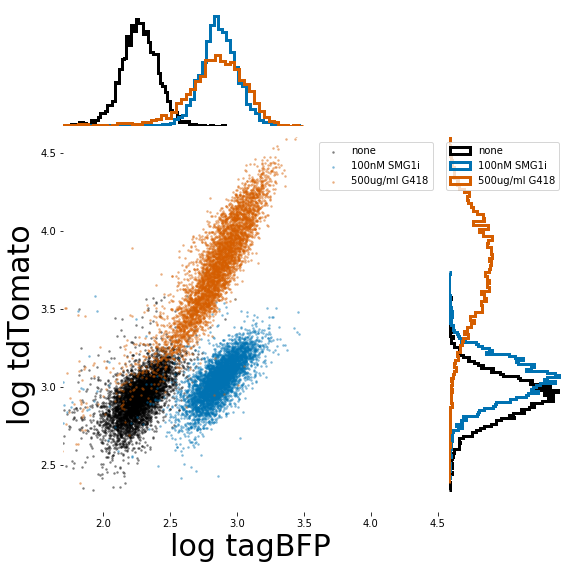

In [66]:
%matplotlib inline
import warnings
import matplotlib as mpl

warnings.filterwarnings("ignore")
mpl.rcParams['pdf.fonttype'] = 42

import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
from matplotlib.ticker import NullFormatter

plotting_cell_lines = ['56_UGAC_x']
plotting_treatments = ['none', '100nM SMG1i', '500ug/ml G418']


nullfmt = NullFormatter()         # no labels

# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left + width + 0.02

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom_h, width, 0.2]
rect_histy = [left_h, bottom, 0.2, height]

# start with a rectangular Figure
plt.figure(1, figsize=(8, 8))

axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)

# no labels
axHistx.xaxis.set_major_formatter(nullfmt)
axHisty.yaxis.set_major_formatter(nullfmt)

axes = [axScatter, axHistx, axHisty]
hist_axes = [axHistx, axHisty]

x_var='log tagBFP'
y_var='log tdTomato'

colors=[black, blue, vermillion]
color_index=0
for treatment in plotting_treatments:
    for cell_line in plotting_cell_lines:
        data = grouped_data.get_group((cell_line, treatment))
        
        data.plot.scatter(x=x_var,y=y_var, color=colors[color_index], alpha=0.5, ax=axScatter, lw=0, s=6, label = treatment)
        data[x_var].plot.hist(histtype='step', bins=100, normed=True, color=colors[color_index], alpha=1, ax=axHistx, lw=3, label = treatment)
        data[y_var].plot.hist(histtype='step', bins=100, normed=True, color=colors[color_index], alpha=1, ax=axHisty, lw=3, orientation='horizontal', label = treatment)
        
        color_index+=1
        
for axis in axes:
    for dir in axis.spines:
        axis.spines[dir].set_visible(False)
for axis in hist_axes:
    axis.get_xaxis().set_ticks([])
    axis.get_yaxis().set_ticks([])
    axis.set_ylabel('')
    axis.set_xlabel('')

axScatter.set_xlabel(x_var, fontsize=30)
axScatter.set_ylabel(y_var, fontsize=30)
axScatter.set_xlim(1.7, 4.5)
axScatter.set_ylim(2.2, 4.6)
axHistx.set_xlim(axScatter.get_xlim())
axHisty.set_ylim(axScatter.get_ylim())

plt.legend()
plt.savefig('E4.036_20190624_UGAC_compare_treatments_common_scale_log.pdf', transparent=True)
#plt.savefig('E4.036_20190624_compare_contexts_log.pdf', transparent=True)

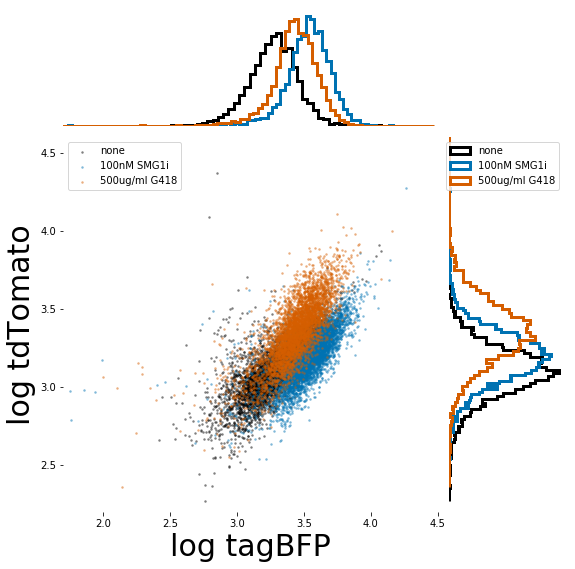

In [67]:
%matplotlib inline
import warnings
import matplotlib as mpl

warnings.filterwarnings("ignore")
mpl.rcParams['pdf.fonttype'] = 42

import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
from matplotlib.ticker import NullFormatter

plotting_cell_lines = ['58_AQP4_x']
plotting_treatments = ['none', '100nM SMG1i', '500ug/ml G418']


nullfmt = NullFormatter()         # no labels

# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left + width + 0.02

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom_h, width, 0.2]
rect_histy = [left_h, bottom, 0.2, height]

# start with a rectangular Figure
plt.figure(1, figsize=(8, 8))

axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)

# no labels
axHistx.xaxis.set_major_formatter(nullfmt)
axHisty.yaxis.set_major_formatter(nullfmt)

axes = [axScatter, axHistx, axHisty]
hist_axes = [axHistx, axHisty]

x_var='log tagBFP'
y_var='log tdTomato'

colors=[black, blue, vermillion]
color_index=0
for treatment in plotting_treatments:
    for cell_line in plotting_cell_lines:
        data = grouped_data.get_group((cell_line, treatment))
        
        data.plot.scatter(x=x_var,y=y_var, color=colors[color_index], alpha=0.5, ax=axScatter, lw=0, s=6, label = treatment)
        data[x_var].plot.hist(histtype='step', bins=100, normed=True, color=colors[color_index], alpha=1, ax=axHistx, lw=3, label = treatment)
        data[y_var].plot.hist(histtype='step', bins=100, normed=True, color=colors[color_index], alpha=1, ax=axHisty, lw=3, orientation='horizontal', label = treatment)
        
        color_index+=1
        
for axis in axes:
    for dir in axis.spines:
        axis.spines[dir].set_visible(False)
for axis in hist_axes:
    axis.get_xaxis().set_ticks([])
    axis.get_yaxis().set_ticks([])
    axis.set_ylabel('')
    axis.set_xlabel('')
axScatter.set_xlabel(x_var, fontsize=30)
axScatter.set_ylabel(y_var, fontsize=30)
axScatter.set_xlim(1.7, 4.5)
axScatter.set_ylim(2.2, 4.6)
axHistx.set_xlim(axScatter.get_xlim())
axHisty.set_ylim(axScatter.get_ylim())

plt.legend()
plt.savefig('E4.036_20190624_AQP4_compare_treatments_common_scale_log.pdf', transparent=True)
#plt.savefig('E4.036_20190624_compare_contexts_log.pdf', transparent=True)

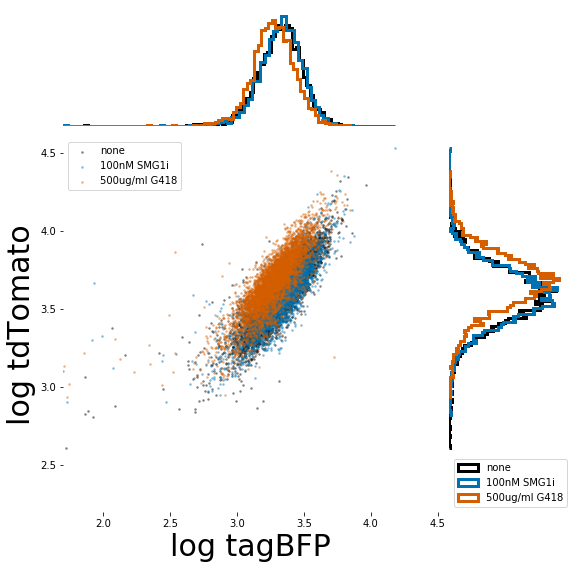

In [65]:
%matplotlib inline
import warnings
import matplotlib as mpl

warnings.filterwarnings("ignore")
mpl.rcParams['pdf.fonttype'] = 42

import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
from matplotlib.ticker import NullFormatter

plotting_cell_lines = ['60_OPRL1_x']
plotting_treatments = ['none', '100nM SMG1i', '500ug/ml G418']


nullfmt = NullFormatter()         # no labels

# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left + width + 0.02

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom_h, width, 0.2]
rect_histy = [left_h, bottom, 0.2, height]

# start with a rectangular Figure
plt.figure(1, figsize=(8, 8))

axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)

# no labels
axHistx.xaxis.set_major_formatter(nullfmt)
axHisty.yaxis.set_major_formatter(nullfmt)

axes = [axScatter, axHistx, axHisty]
hist_axes = [axHistx, axHisty]

x_var='log tagBFP'
y_var='log tdTomato'

colors=[black, blue, vermillion]
color_index=0
for treatment in plotting_treatments:
    for cell_line in plotting_cell_lines:
        data = grouped_data.get_group((cell_line, treatment))
        
        data.plot.scatter(x=x_var,y=y_var, color=colors[color_index], alpha=0.5, ax=axScatter, lw=0, s=6, label = treatment)
        data[x_var].plot.hist(histtype='step', bins=100, normed=True, color=colors[color_index], alpha=1, ax=axHistx, lw=3, label = treatment)
        data[y_var].plot.hist(histtype='step', bins=100, normed=True, color=colors[color_index], alpha=1, ax=axHisty, lw=3, orientation='horizontal', label = treatment)
        
        color_index+=1
        
for axis in axes:
    for dir in axis.spines:
        axis.spines[dir].set_visible(False)
for axis in hist_axes:
    axis.get_xaxis().set_ticks([])
    axis.get_yaxis().set_ticks([])
    axis.set_ylabel('')
    axis.set_xlabel('')
axScatter.set_xlabel(x_var, fontsize=30)
axScatter.set_ylabel(y_var, fontsize=30)
axScatter.set_xlim(1.7, 4.5)
axScatter.set_ylim(2.2, 4.6)
axHistx.set_xlim(axScatter.get_xlim())
axHisty.set_ylim(axScatter.get_ylim())

plt.legend()
plt.savefig('E4.036_20190624_OPRL1_compare_treatments_common_scale_log.pdf', transparent=True)
#plt.savefig('E4.036_20190624_compare_contexts_log.pdf', transparent=True)

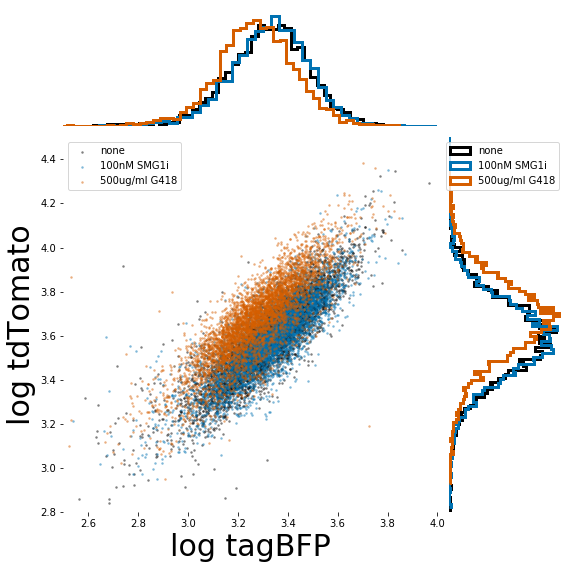

In [64]:
%matplotlib inline
import warnings
import matplotlib as mpl

warnings.filterwarnings("ignore")
mpl.rcParams['pdf.fonttype'] = 42

import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
from matplotlib.ticker import NullFormatter

plotting_cell_lines = ['60_OPRL1_x']
plotting_treatments = ['none', '100nM SMG1i', '500ug/ml G418']


nullfmt = NullFormatter()         # no labels

# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left + width + 0.02

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom_h, width, 0.2]
rect_histy = [left_h, bottom, 0.2, height]

# start with a rectangular Figure
plt.figure(1, figsize=(8, 8))

axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)

# no labels
axHistx.xaxis.set_major_formatter(nullfmt)
axHisty.yaxis.set_major_formatter(nullfmt)

axes = [axScatter, axHistx, axHisty]
hist_axes = [axHistx, axHisty]

x_var='log tagBFP'
y_var='log tdTomato'

colors=[black, blue, vermillion]
color_index=0
for treatment in plotting_treatments:
    for cell_line in plotting_cell_lines:
        data = grouped_data.get_group((cell_line, treatment))
        
        data.plot.scatter(x=x_var,y=y_var, color=colors[color_index], alpha=0.5, ax=axScatter, lw=0, s=6, label = treatment)
        data[x_var].plot.hist(histtype='step', bins=100, normed=True, color=colors[color_index], alpha=1, ax=axHistx, lw=3, label = treatment)
        data[y_var].plot.hist(histtype='step', bins=100, normed=True, color=colors[color_index], alpha=1, ax=axHisty, lw=3, orientation='horizontal', label = treatment)
        
        color_index+=1
        
for axis in axes:
    for dir in axis.spines:
        axis.spines[dir].set_visible(False)
for axis in hist_axes:
    axis.get_xaxis().set_ticks([])
    axis.get_yaxis().set_ticks([])
    axis.set_ylabel('')
    axis.set_xlabel('')
axScatter.set_xlabel(x_var, fontsize=30)
axScatter.set_ylabel(y_var, fontsize=30)
axScatter.set_xlim(2.5, 4.)
axScatter.set_ylim(2.8, 4.5)
axHistx.set_xlim(axScatter.get_xlim())
axHisty.set_ylim(axScatter.get_ylim())

plt.legend()
plt.savefig('E4.036_20190624_OPRL1_compare_treatments_log.pdf', transparent=True)
#plt.savefig('E4.036_20190624_compare_contexts_log.pdf', transparent=True)